In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt25 = "Simulate 1L6X at pH 5.0 and 8.8, then analyze the SASA and RMSF under both pH conditions."
llm_var = "gpt-4-1106-preview"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-07
time: 20:07:22
LLM:  gpt-4-1106-preview 
Temperature:  0.1


In [3]:
agent.run(prompt25)

Thought: To simulate the protein 1L6X at different pH conditions and analyze the SASA and RMSF, I will need to perform several steps. First, I need to obtain the structure of the protein, then set up and run the molecular dynamics simulations at the specified pH levels. After the simulations are complete, I will analyze the Solvent Accessible Surface Area (SASA) and Root Mean Square Fluctuation (RMSF) for both pH conditions. I will start by downloading the structure of the protein using the PDB ID 1L6X.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": {
        "query": "1L6X"
    }
}
```
PDB file found with this ID: 1L6X
Now that I have the PDB file for 1L6X, the next step is to prepare the protein for simulation. This involves cleaning the structure, which may include removing water molecules and other heteroatoms, adding missing atoms, and adding hydrogens appropriate for the specified pH levels. Since pH can affect the protonation states of amino acids, I will 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-07
time: 20:37:11
Files found in registry: 1L6X_200730: PDB file downloaded from RSCB
 PDBFile ID: 1L6X_200730
 1L6X_200738: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 5.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_200757: Initial positions for simulation sim0_200757
 sim0_200757: Basic Simulation of Protein 1L6X_200738
 rec0_200802: Simulation trajectory for protein 1L6X_200738 and simulation sim0_200757
 rec1_200802: Simulation state log for protein 1L6X_200738 and simulation sim0_200757
 rec2_200802: Simulation pdb frames for protein 1L6X_200738 and simulation sim0_200757
 1L6X_201629: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 8.8. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_201640: Initial positions for simulation sim0_201640
 sim0_201640: Basic Simulation of Protein 1L6X_201629
 rec0_

In [8]:
path_oxygenated = registry.get_mapped_path("fig0_203037")
path_deoxygenated = registry.get_mapped_path("fig0_203652")
assert os.path.exists(path_oxygenated), 'Path not found'
assert os.path.exists(path_deoxygenated), 'Path not found'
assert path_oxygenated != path_deoxygenated, 'Paths are the same'

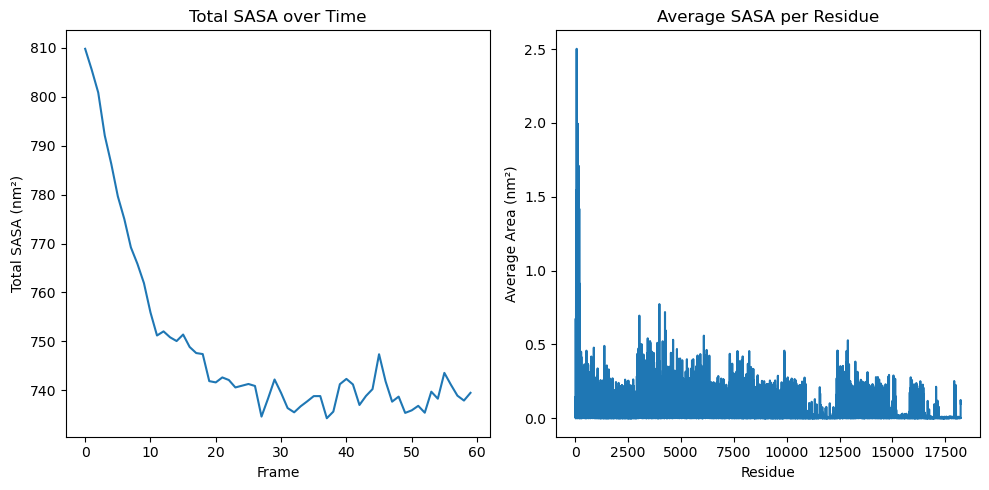

In [9]:
from IPython.display import Image
Image(filename=path_oxygenated)


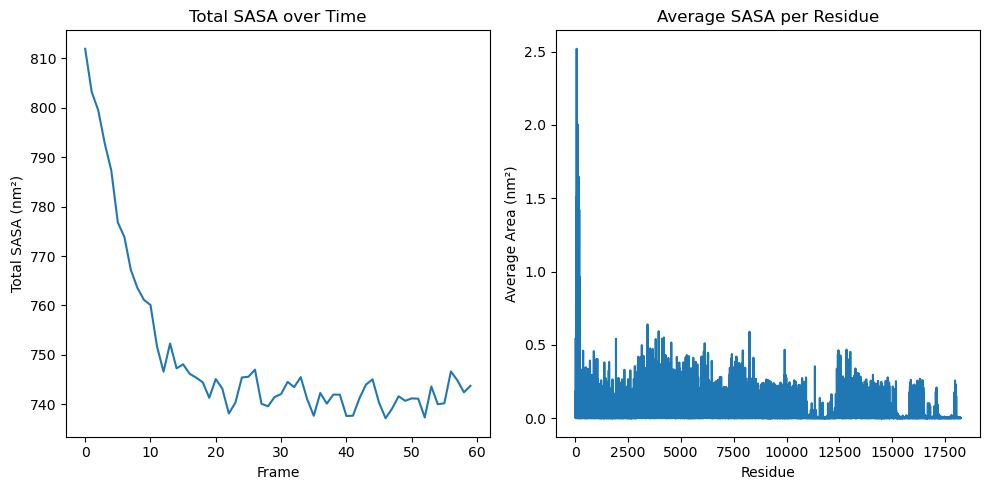

In [10]:
Image(filename=path_deoxygenated)

In [11]:
path_oxygenated = registry.get_mapped_path("fig0_203658")
path_deoxygenated = registry.get_mapped_path("fig0_203703")
assert os.path.exists(path_oxygenated), 'Path not found'
assert os.path.exists(path_deoxygenated), 'Path not found'
assert path_oxygenated != path_deoxygenated, 'Paths are the same'

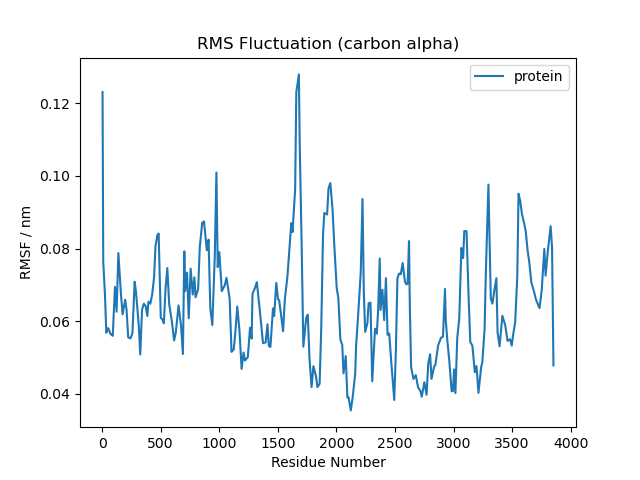

In [12]:
Image(filename=path_oxygenated)


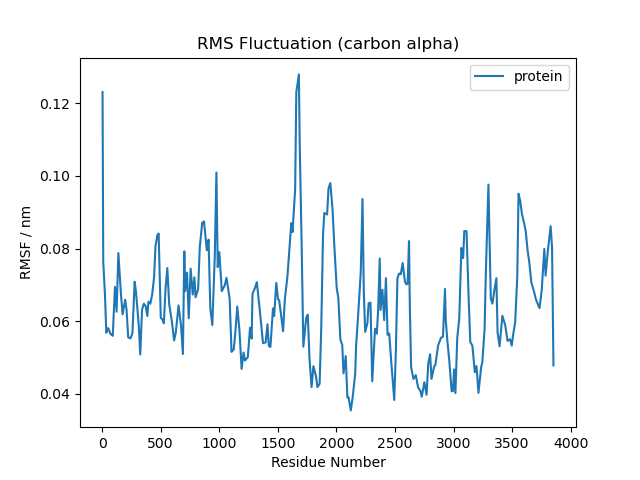

In [13]:
Image(filename=path_oxygenated)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### No hallucinations ✅
### Logic make sense ✅
### Correct Answer  ✅